In [14]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = []
for xml in os.listdir('PlantCLEF2015TestDataWithAnnotations/'):
    if xml.endswith('.xml'):
        tree = ET.parse('PlantCLEF2015TestDataWithAnnotations/'+xml)
        root = tree.getroot()
        filename = root[1].text
        content = root[3].text
        family = root[5].text
        genus = root[6].text
        species = root[7].text
        data.append([filename,content,family,genus,species])
df = pd.DataFrame(data=data,columns=['Filename','Content','Family','Genus','Species'])
df.to_csv("test_dataset_info.csv", encoding='utf-8')

In [6]:
test_images

,Filename,Content,Family,Genus,Species
0,77423,Entire,Amaryllidaceae,Galanthus,Galanthus nivalis L.
1,29239,Leaf,Woodsiaceae,Athyrium,Athyrium filix-femina (L.) Roth
2,36319,Leaf,Fabaceae,Cercis,Cercis siliquastrum L.
3,67630,LeafScan,Oleaceae,Fraxinus,Fraxinus angustifolia Vahl
4,61241,Branch,Verbenaceae,Verbena,Verbena officinalis L.
...,...,...,...,...,...
21441,20562,Flower,Xanthorrhoeaceae,Asphodelus,Asphodelus albus Mill.
21442,30771,Entire,Fabaceae,Melilotus,Melilotus albus Medik.
21443,29220,Leaf,Rosaceae,Fragaria,Fragaria vesca L.
21444,85874,Branch,Amaranthaceae,Chenopodium,Chenopodium album L.


In [8]:
# Dic: dicionário de Espécie/Gênero e Família para cada id {0,1,2,...,n}.
# Bins: Agrupa os ids das imagens correspondentes à cada instância (eg., espécime). 
species_dic = []
species = test_images.Species
for i in range(len(test_images)):
    specimen = species[i]
    op = 0
    for j in range(len(species_dic)):
        if species_dic[j] == specimen:
            op = 1
    if op == 0:
        species_dic.append(specimen)
species_bins = {}
for i in range(len(species_dic)):
    species_bins[species_dic[i]] = []
for img in range(len(test_images)):
    species = test_images.Species[img]
    filename = test_images.Filename[img]
    species_bins[species].append(filename) 

genera_dic = []
genera = test_images.Genus
for i in range(len(test_images)):
    genus = genera[i]
    op = 0
    for j in range(len(genera_dic)):
        if genera_dic[j] == genus:
            op = 1
    if op == 0:
        genera_dic.append(genus)
        
genus_bins = {}
for i in range(len(genera_dic)):
    genus_bins[genera_dic[i]] = []
for img in range(len(test_images)):
    genus = test_images.Genus[img]
    filename = test_images.Filename[img]
    genus_bins[genus].append(filename) 
    
familiae_dic = []
familiae = test_images.Family
for i in range(len(test_images)):
    family = familiae[i]
    op = 0
    for j in range(len(familiae_dic)):
        if familiae_dic[j] == family:
            op = 1
    if op == 0:
        familiae_dic.append(family)
family_bins = {}
for i in range(len(familiae_dic)):
    family_bins[familiae_dic[i]] = []
for img in range(len(test_images)):
    family = test_images.Family[img]
    filename = test_images.Filename[img]
    family_bins[family].append(filename)     
    
print(len(family_bins))
print(len(genus_bins))
print(len(species_bins))

# Calcula a quantidade de imagens por espécie, gênero e família para cada instância.
species_data_distribution = []
for i in range(len(species_bins)):
    species_data_distribution.append(len(species_bins[species_dic[i]]))

add = 0
for i in range(len(species_data_distribution)):
    add = add + species_data_distribution[i]
    
genera_data_distribution = []
for i in range(len(genus_bins)):
    genera_data_distribution.append(len(genus_bins[genera_dic[i]]))

add = 0
for i in range(len(genera_data_distribution)):
    add = add + genera_data_distribution[i]

familiae_data_distribution = []
for i in range(len(family_bins)):
    familiae_data_distribution.append(len(family_bins[familiae_dic[i]]))

add = 0
for i in range(len(familiae_data_distribution)):
    add = add + familiae_data_distribution[i]

124
509
975
21446
21446
21446


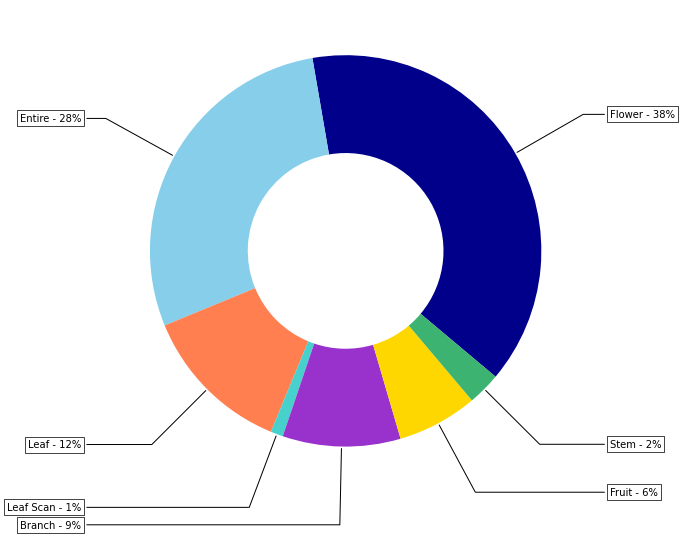

In [29]:
fig, ax2 = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))

types = ["Flower - 38%",
        "Entire - 28%",
        "Leaf - 12%",
        "Leaf Scan - 1%",
        "Branch - 9%",
        "Fruit - 6%",
        "Stem - 2%"]

data = [8327, 6113, 2690, 221, 2088, 1423, 584]
colors=['darkblue','skyblue','coral','mediumturquoise','darkorchid','gold','mediumseagreen']
wedges, texts = ax2.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(types[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
#ax2.legend()
